In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class State:
    
    parallel = 1
    antiparallel = -1
       
    def __init__(self,N=100,mu_H=3):
        self.state = self.initialize_particles(N) #adding abstraction for future optimization of initalization fx
        self.N=N
        self.mu_H = mu_H
        
    def initialize_particles(self,N): #initializes particles in N-d numpy array of 1's and -1's
        states_temp = [rd.randint(0,1) for i in range(0,100)]
        return np.asarray([i if i==self.parallel else self.antiparallel for i in states_temp])
    
    def energy(self): #returns total state energy in units Energy / unit beta
        return np.sum(-self.mu_H * self.state)
   
    def magnetization(self): #returns total state magnetization in units Magnetization * H
        return np.sum(self.mu_H * self.state) # the true magnetization is this value divided by H
    
    def swap(self,idx): #swaps the spin of a specific particle
        if self.state[idx] == self.parallel:
            self.state[idx]  = self.antiparallel
        else:
            self.state[idx] = self.parallel

    def evolve(self): #randomly switches the spin of one particle. Can be modified for different evolution types
        idx = rd.randint(0,99)
        self.prev_evolve = idx
        self.swap(idx)
        
    def reverse_evolve(self): #returns the last-swapped particle to its previous spin
        self.swap(self.prev_evolve)
        
    
            
    


In [8]:
def metroMC(N=100,mu_H=3,num_trials=100000):
    sys = State(N=N,mu_H = mu_H)
    M_summed = sys.magnetization() #summed magnetization of all trials
    
    for i in range(num_trials): #perform each metroMC trial
        prev_energy = sys.energy() #record energy of current state to compare with after evolution
        sys.evolve() 
        if rd.uniform(0,1) < min(1,np.exp(-1*(sys.energy()-prev_energy))): #decision on whether to keep new state
            continue
        else:
            sys.reverse_evolve()
        
        M_summed += sys.magnetization() #add the magnetization to the total
        
    return M_summed/num_trials
        

In [9]:
mu_H_arr = np.arange(-3,3,0.5)
N=100
y_metroMC = []
y_analytical = []

for val in mu_H_arr:
    y_metroMC.append(metroMC(N=N,mu_H=val))
    y_analytical.append(N*val*np.tanh(val))

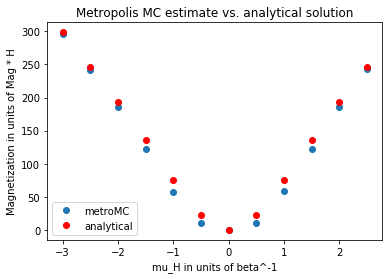

In [14]:
plt.plot(mu_H_arr,y_metroMC,'o',label='metroMC')
plt.plot(mu_H_arr,y_analytical,'ro',label='analytical')
plt.title("Metropolis MC estimate vs. analytical solution")
plt.xlabel('mu_H in units of beta^-1')
plt.ylabel('Magnetization in units of Mag * H')
plt.legend(loc='lower left')
plt.show()
    